In [1]:
import re
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
import sys
import os

sys.path.insert(1, '../src/')

from partyset import PartySet
from utils import data_utils

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chrislzc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chrislzc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
os.getcwd()
os.chdir("..")

In [4]:
dems = PartySet('data/democrats')
reps = PartySet('data/republicans')

In [5]:
dem_docs = dems.get_all_text()
rep_docs = reps.get_all_text()

all_docs = dem_docs + rep_docs

In [6]:
dem = [data_utils.clean_text(doc) for doc in dem_docs]
rep = [data_utils.clean_text(doc) for doc in rep_docs]

In [7]:
dems

In [8]:
count_dem, stemmed_dem = data_utils.stemmed_text(dem)
count_rep, stemmed_rep = data_utils.stemmed_text(rep)

In [9]:
cleaned_docs = [data_utils.clean_text(doc) for doc in all_docs]

In [10]:
count_df, stemmed_docs = data_utils.stemmed_text(cleaned_docs)

### Sentiment Analysis

In [11]:
import nltk
nltk.download('vader_lexicon') ### First time use requires downloading
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chrislzc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
analyser = SentimentIntensityAnalyzer()

In [13]:
temp = cleaned_docs[0]
temp = ' '.join([str(elem) for elem in temp])

In [14]:
temp

'corruption ballot georgia today'

In [15]:
analyser.polarity_scores(temp)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [16]:
df = pd.DataFrame(pd.Series(cleaned_docs), columns = ['text'])
df.head()

,text
0,"[corruption, ballot, georgia, today]"
1,"[understand, donald, trump, republican, enable..."
2,"[today, last, day, vote, georgia, voted, yet, ..."
3,"[honored, call, dear, friend, voice, congress,..."
4,"[everything, stake, georgia, part, fight, help..."


In [17]:
df['string'] = df['text'].apply(lambda x: ' '.join([str(elem) for elem in x]))

In [18]:
df['sentiment'] = df.string.apply(analyser.polarity_scores)

In [19]:
sentiment_score = list(df['sentiment'])
compound_score = [sentiment_score[i]['compound'] for i in range(len(sentiment_score))]

In [20]:
df['sentiment_score'] = compound_score

In [21]:
df.head()

,text,string,sentiment,sentiment_score
0,"[corruption, ballot, georgia, today]",corruption ballot georgia today,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,"[understand, donald, trump, republican, enable...",understand donald trump republican enablers tr...,"{'neg': 0.123, 'neu': 0.751, 'pos': 0.126, 'co...",0.0258
2,"[today, last, day, vote, georgia, voted, yet, ...",today last day vote georgia voted yet make pla...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,"[honored, call, dear, friend, voice, congress,...",honored call dear friend voice congress indisp...,"{'neg': 0.14, 'neu': 0.363, 'pos': 0.497, 'com...",0.7845
4,"[everything, stake, georgia, part, fight, help...",everything stake georgia part fight help cross...,"{'neg': 0.211, 'neu': 0.569, 'pos': 0.22, 'com...",0.0258


In [22]:
def sentiment_classifier(sentiment):
    if sentiment >= 0.05:
        return 'Positive'
    elif sentiment <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [23]:
dem

[['corruption', 'ballot', 'georgia', 'today'],
 ['understand',
  'donald',
  'trump',
  'republican',
  'enablers',
  'trying',
  'overturn',
  'people',
  'wo',
  'succeed',
  'setting',
  'dangerous',
  'precedent',
  'everyone',
  'believes',
  'democracy',
  'needs',
  'speak',
  'say',
  'enough',
  'enough'],
 ['today',
  'last',
  'day',
  'vote',
  'georgia',
  'voted',
  'yet',
  'make',
  'plan',
  'cast',
  'ballot',
  'today'],
 ['honored',
  'call',
  'dear',
  'friend',
  'voice',
  'congress',
  'indispensable',
  'leads',
  'conviction',
  'fights',
  'heart'],
 ['everything',
  'stake',
  'georgia',
  'part',
  'fight',
  'help',
  'cross',
  'finish',
  'line'],
 ['giant',
  'corporations',
  'like',
  'google',
  'much',
  'power',
  'bad',
  'innovation',
  'bad',
  'consumers',
  'bad',
  'workers',
  'standing',
  'solidarity',
  'google',
  'workers',
  'fight',
  'back',
  'unionizing'],
 ['join',
  'tonight',
  'pm',
  'et',
  'phone',
  'bank',
  'help',
  'ge

In [24]:
dem_df = pd.DataFrame(pd.Series(dem), columns = ['text'])

In [25]:
dem_df['string'] = dem_df['text'].apply(lambda x: ' '.join([str(elem) for elem in x]))

In [26]:
dem_df['sentiment'] = dem_df.string.apply(analyser.polarity_scores)

In [27]:
dem_sentiment_score = list(dem_df['sentiment'])
dem_compound_score = [dem_sentiment_score[i]['compound'] for i in range(len(dem_sentiment_score))]

In [28]:
dem_df['sentiment_score'] = dem_compound_score

In [29]:
dem_df.sentiment_score.apply(sentiment_classifier)

0         Neutral
1         Neutral
2         Neutral
3        Positive
4         Neutral
5        Negative
6        Positive
7        Negative
8        Positive
9        Positive
10       Positive
11       Positive
12       Positive
13        Neutral
14       Positive
15       Positive
16       Positive
17       Positive
18       Positive
19       Positive
20       Positive
21       Negative
22       Positive
23        Neutral
24       Positive
25       Positive
26       Positive
27       Positive
28       Positive
29       Positive
           ...   
10121    Positive
10122    Negative
10123    Positive
10124    Positive
10125    Positive
10126    Positive
10127    Positive
10128    Positive
10129    Negative
10130    Positive
10131    Positive
10132    Negative
10133    Positive
10134     Neutral
10135    Positive
10136    Negative
10137    Negative
10138    Negative
10139    Positive
10140    Positive
10141    Positive
10142    Positive
10143    Positive
10144    Negative
10145    P

In [30]:
def sentiment_scores(text):
    '''
    Input: List of cleaned text from each twitter user. 
    Use data_utils.clean_text before applying this function.
    
    Output: Returns dataframe with 4 columns - 
    ['text_list', 'text_string', 'sentiment_components', 'sentiment_score', 'sentiment_type']
    
    Combines the text used in NLTK.Vader sentiment analysis and the
    individual and compounded sentiment scores of the text.
    '''
    analyser = SentimentIntensityAnalyzer()
    df = pd.DataFrame(pd.Series(text), columns = ['text_list'])
    df['text_string'] = df['text_list'].apply(lambda x: ' '.join([str(elem) for elem in x]))
    df['sentiment_components'] = df['text_string'].apply(analyser.polarity_scores)
    
    sentiment_score = list(df['sentiment_components'])
    compound_score = [sentiment_score[i]['compound'] for i in range(len(sentiment_score))]
    df['sentiment_score'] = compound_score
    
    def sentiment_classifier(sentiment):
        if sentiment >= 0.05:
            return 'Positive'
        elif sentiment <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'
    
    df['sentiment_type'] = df['sentiment_score'].apply(sentiment_classifier)
    
    return df

In [31]:
sentiment_scores(dem).groupby('sentiment_type').count()

,text_list,text_string,sentiment_components,sentiment_score
sentiment_type,,,,
Negative,3230,3230,3230,3230
Neutral,1293,1293,1293,1293
Positive,5628,5628,5628,5628


In [32]:
sentiment_scores(rep).groupby('sentiment_type').count()

,text_list,text_string,sentiment_components,sentiment_score
sentiment_type,,,,
Negative,1726,1726,1726,1726
Neutral,1813,1813,1813,1813
Positive,3978,3978,3978,3978


### Visualization

In [33]:
import matplotlib.pyplot as plt

In [34]:
labels = 'Negative', 'Neutral', 'Positive'
dem_fracs = [3230, 1293, 5628]
rep_fracs = [1726, 1813, 3978]

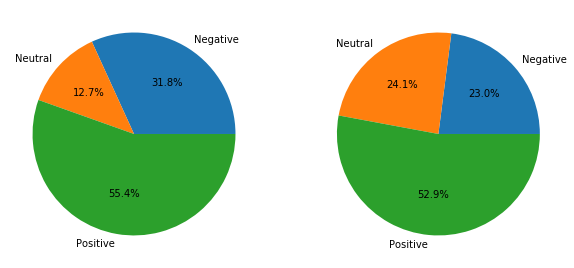

In [35]:
fig, axs = plt.subplots(1, 2, figsize = (10,5))
theme = plt.get_cmap('copper')
axs[0].pie(dem_fracs, labels=labels, autopct='%1.1f%%')
axs[1].pie(rep_fracs, labels=labels, autopct='%1.1f%%')
plt.show()

In [36]:
data_utils.compute_sentiment_scores(dem)

,text_list,text_string,sentiment_components,sentiment_score,sentiment_type
0,"[corruption, ballot, georgia, today]",corruption ballot georgia today,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,"[understand, donald, trump, republican, enable...",understand donald trump republican enablers tr...,"{'neg': 0.123, 'neu': 0.751, 'pos': 0.126, 'co...",0.0258,Neutral
2,"[today, last, day, vote, georgia, voted, yet, ...",today last day vote georgia voted yet make pla...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,"[honored, call, dear, friend, voice, congress,...",honored call dear friend voice congress indisp...,"{'neg': 0.14, 'neu': 0.363, 'pos': 0.497, 'com...",0.7845,Positive
4,"[everything, stake, georgia, part, fight, help...",everything stake georgia part fight help cross...,"{'neg': 0.211, 'neu': 0.569, 'pos': 0.22, 'com...",0.0258,Neutral
5,"[giant, corporations, like, google, much, powe...",giant corporations like google much power bad ...,"{'neg': 0.404, 'neu': 0.37, 'pos': 0.225, 'com...",-0.7783,Negative
6,"[join, tonight, pm, et, phone, bank, help, geo...",join tonight pm et phone bank help georgia fli...,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...",0.5994,Positive
7,"[happy, new, year, still, fighting, put, polit...",happy new year still fighting put political ec...,"{'neg': 0.234, 'neu': 0.596, 'pos': 0.17, 'com...",-0.1027,Negative
8,"[sharing, stories, meant, much, campaign, hope...",sharing stories meant much campaign hope enjoy,"{'neg': 0.0, 'neu': 0.31, 'pos': 0.69, 'compou...",0.8360,Positive
9,"[happy, new, year, eve, hope, loved, ones, saf...",happy new year eve hope loved ones safe health...,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.9559,Positive


In [37]:
data_utils.compute_sentiment_scores(rep)

,text_list,text_string,sentiment_components,sentiment_score,sentiment_type
0,"[vice, president, power, reject, fraudulently,...",vice president power reject fraudulently chose...,"{'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compou...",-0.4019,Negative
1,"[see, dc]",see dc,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,"[georgia, get, vote, two, great, senators, imp...",georgia get vote two great senators important,"{'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'comp...",0.7096,Positive
3,"[pleased, announce, amp, joined, great, stopth...",pleased announce amp joined great stopthesteal...,"{'neg': 0.341, 'neu': 0.449, 'pos': 0.21, 'com...",-0.5267,Negative
4,[],,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,Neutral
5,[],,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,Neutral
6,[],,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,Neutral
7,[],,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,Neutral
8,[],,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,Neutral
9,"[way, see, soon]",way see soon,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


### Bag of Words

In [38]:
analyser = SentimentIntensityAnalyzer()

In [39]:
dem_words = count_dem.word.to_list()

In [40]:
dem_sentiment = [analyser.polarity_scores(word) for word in dem_words]

In [41]:
dem_words_df = count_dem.assign(sentiment_components = dem_sentiment)
dem_sentiment_score = list(dem_words_df['sentiment_components'])
dem_compound_score = [dem_sentiment_score[i]['compound'] for i in range(len(dem_sentiment_score))]
dem_words_df['sentiment_score'] = dem_compound_score

In [42]:
dem_words_df['sentiment_type'] = dem_words_df['sentiment_score'].apply(sentiment_classifier)

In [43]:
dem_words_df.groupby('sentiment_type').count()

,term_count,doc_count,word,idf,tf_idf,sentiment_components,sentiment_score
sentiment_type,,,,,,,
Negative,304,304,304,304,304,304,304
Neutral,6730,6730,6730,6730,6730,6730,6730
Positive,242,242,242,242,242,242,242


In [44]:
dem_words_df.head()

,term_count,doc_count,word,idf,tf_idf,sentiment_components,sentiment_score,sentiment_type
6,2206,2024,trump,2.612595,5763.384524,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
20,1654,1423,need,2.964903,4903.950242,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
11,1677,1514,peopl,2.902916,4868.189420,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
133,1535,1419,american,2.967718,4555.447640,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
26,1362,1002,vote,3.315673,4515.946255,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral


## Small Issue:
We need to adjust the stemmed words function or apply a different sentiment analysis tool since many stems are not recognized as words.

In [45]:
def bag_of_words_sentiment(tfidf_df):
    '''
    Processes the bag of words from TF-IDF with NLTK.Vader sentiment analysis.
    
    Input: Dataframe of bag of words from each party's representitive. 
    Use data_utils.stemmed_text before applying this function.
    
    Output: Returns dataframe with 8 columns - 
    ['term_count', 'doc_count', 'word', 'idf', 'tf_idf', 
     'sentiment_components', sentiment_score', 'sentiment_type']
    '''
    analyser = SentimentIntensityAnalyzer()
    words = tfidf_df.word.to_list()
    sentiment = [analyser.polarity_scores(word) for word in words]
    df = tfidf_df.assign(sentiment_components = sentiment)
    sentiment_score = list(df['sentiment_components'])
    compound_score = [sentiment_score[i]['compound'] for i in range(len(sentiment_score))]
    df['sentiment_score'] = compound_score
    df['sentiment_type'] = df['sentiment_score'].apply(sentiment_classifier)
    return df

In [51]:
bow_dem = data_utils.bag_of_words_sentiment(count_dem)
bow_dem.groupby('sentiment_type').count()

,term_count,doc_count,word,idf,tf_idf,sentiment_components,sentiment_score
sentiment_type,,,,,,,
Negative,304,304,304,304,304,304,304
Neutral,6730,6730,6730,6730,6730,6730,6730
Positive,242,242,242,242,242,242,242


In [47]:
from collections import defaultdict

In [48]:
def common_words(full_text):
    '''
    Stems the full_text input and returns a dataframe 
    with the count of each distinct word. This function 
    requires input to be cleaned first using clean_text.
    '''
    wordCount = defaultdict(int) # initialize wordcount dictionary
    for tweet in full_text:
        for w in tweet:
            wordCount[w] += 1 # increment wordcount
    counts = [(wordCount[w], w) for w in wordCount]
    counts.sort(reverse = True) # sort from most frequent to least frequent
    output = pd.DataFrame(data = counts, columns = ['count', 'word'])
    return output

In [49]:
word_count_dem = data_utils.common_words(dem)

In [50]:
data_utils.bag_of_words_sentiment(word_count_dem).groupby('sentiment_type').count()

,count,word,sentiment_components,sentiment_score
sentiment_type,,,,
Negative,879,879,879,879
Neutral,9066,9066,9066,9066
Positive,726,726,726,726
